In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import matplotlib as mpl

In [2]:
region = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
all_IFN_num = pd.DataFrame([], columns = ["ClubEpi",
               "CiliatedEpi",
               "AT2",
               "AT1",
               "AdventitialFib",
               "AlveolarFib",
               "SMC",
               "SCMF",
               "Pericyte",
               "Artery",
               "Vein",
               "Capillary",
               "LymphaticEndo",
               "AlveolarMac",
               "InterstitialMac",
               "InflamMac",
               "PatrolMac",
               "DC",
               "pDC",
               "Neutrophil",
               "Tcell (CD4)",
               "Tcell (CD8)",
               "Bcell"])
for i in range(len(region)):
    region_IFN_frac = pd.read_csv("region"+region[i]+"_ifn_info1120.csv", header = 0, index_col = 0)
    all_IFN_num = pd.concat([all_IFN_num, region_IFN_frac.T])

all_IFN = pd.DataFrame(all_IFN_num)

In [3]:
region = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
all_plaque_num = pd.DataFrame([], 
    columns = ["ClubEpi",
               "CiliatedEpi",
               "AT2",
               "AT1",
               "AdventitialFib",
               "AlveolarFib",
               "SMC",
               "SCMF",
               "Pericyte",
               "Artery",
               "Vein",
               "Capillary",
               "LymphaticEndo",
               "AlveolarMac",
               "InterstitialMac",
               "InflamMac",
               "PatrolMac",
               "DC",
               "pDC",
               "Neutrophil",
               "Tcell (CD4)",
               "Tcell (CD8)",
               "Bcell"])
for i in range(len(region)):
    region_comp = pd.read_csv("region"+region[i]+"_plaque_info1120.csv", header = 0, index_col = 0)
    all_plaque_num = pd.concat([all_plaque_num, region_comp])
all_plaque_num = pd.DataFrame(all_plaque_num)

In [4]:
# calculate the composition of each focus (divided by total number of cells)

row_sums = all_plaque_num.sum(axis=1)
plaque_freq = all_plaque_num.div(row_sums, axis=0)
all_IFN.index = plaque_freq.index
mask = (plaque_freq['CiliatedEpi'] + plaque_freq['ClubEpi'] + plaque_freq['AT1'] + plaque_freq['AT2']) > 0
all_plaque_comp = plaque_freq[mask]
all_IFN_num = all_IFN[mask]
all_plaque = all_plaque_num[mask]

In [5]:
# colormap for each cell type
custom_hex = [
    "#1F77B4",  # ClubEpi
    "#AEC7E8",  # CiliatedEpi
    "#FF7F0E",  # AT2
    "#FFBB78",  # AT1
    "#2CA02C",  # AdventitialFib
    "#98DF8A",  # AlveolarFib
    "#D62728",  # SMC
    "#FF9896",  # SCMF
    "#9467BD",  # Pericyte
    "#8C564B",  # Artery
    "#C49C94",  # Vein
    "#E377C2",  # Capillary
    "#F7B6D2",  # LymphaticEndo
    "#7F7F7F",  # AlveolarMac
    "#C7C7C7",  # InterstitialMac
    "#BCBD22",  # InflamMac
    "#DBDB8D",  # PatrolMac
    "#17BECF",  # DC
    "#9EDAE5",  # pDC
    "#393B79",  # Neutrophil
    "#637939",  # Tcell (CD4)
    "#B5CF6B",  # Tcell (CD8)
    "#843C39"   # Bcell
]


/var/folders/9m/p4wnjjxs5916tfkbxzfts9yw0000gn/T/ipykernel_93290/3069335201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airway['sum'] = airway['CiliatedEpi'] + airway['ClubEpi']


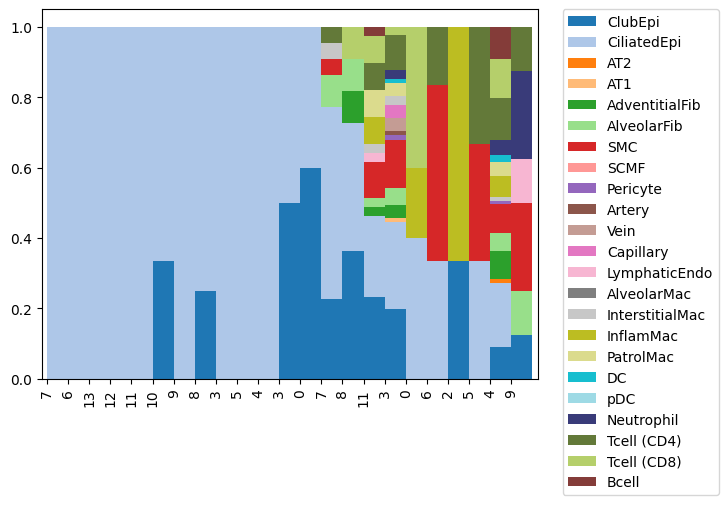

In [6]:
# examine airway foci
airway = all_plaque_comp[(all_plaque_comp['CiliatedEpi'] > 0.00) | (all_plaque_comp['ClubEpi'] > 0.00)]
airway['sum'] = airway['CiliatedEpi'] + airway['ClubEpi']
airway_sort = airway.sort_values(by = 'sum', ascending = False)
airway_sort.drop(columns = ['sum'], inplace = True)
airway_sort.plot(kind='bar', stacked=True, color = custom_hex,align='edge', width=1.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("251209_airway_foci.pdf", format='pdf')

[11, 10, 17, 16, 15, 14, 13, 12, 1, 9, 8, 7, 20, 4, 5, 6, 3, 21, 19, 0, 18, 2, 22]


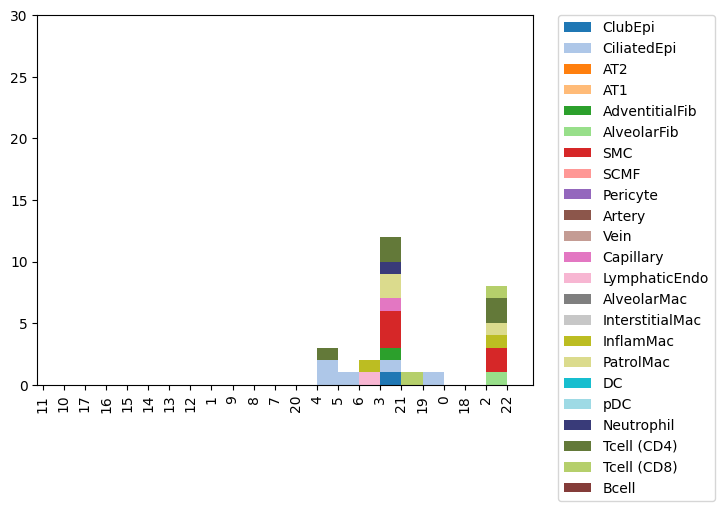

In [7]:
# subset airway foci only
mask = (all_plaque_comp['CiliatedEpi'] > 0.00) | (all_plaque_comp['ClubEpi'] > 0) 
airway = all_plaque_comp[mask].reset_index(drop=True).copy()
airway_ifn = all_IFN_num[mask].reset_index(drop=True).copy()
# order foci based on fraction of epithelial cells 
airway_sort = airway.assign(
    sum=airway['CiliatedEpi'] + airway['ClubEpi']
).sort_values(by='sum', ascending=False)

ordered_indices = airway_sort.index.tolist()
print(ordered_indices)
airway_ifn_sort = airway_ifn.loc[ordered_indices,:]
airway_ifn_sort.plot(kind='bar', stacked=True, color = custom_hex,align='edge', width=1.0)
plt.ylim(0, 30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("251209_airway_ifn.pdf", format='pdf')

/var/folders/9m/p4wnjjxs5916tfkbxzfts9yw0000gn/T/ipykernel_93290/322150475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alveolar['sum'] = alveolar['AT1'] + alveolar['AT2']


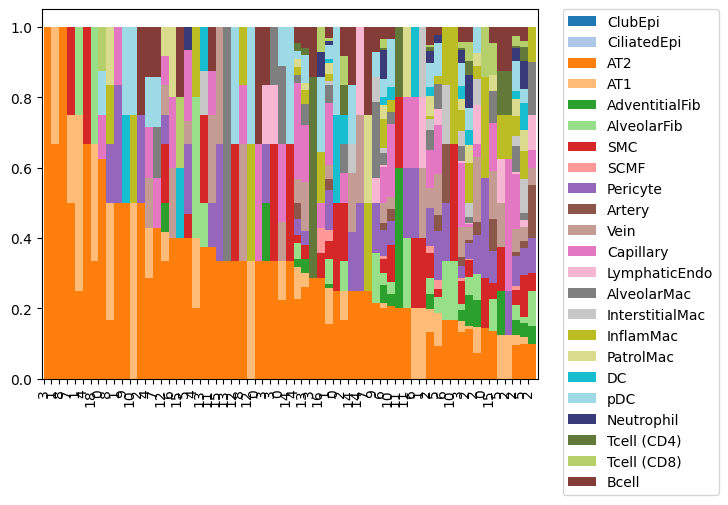

In [8]:
# examine alveolar foci
alveolar = all_plaque_comp[(all_plaque_comp['CiliatedEpi'] + all_plaque_comp['ClubEpi']) ==0]
alveolar['sum'] = alveolar['AT1'] + alveolar['AT2']
alveolar_sort = alveolar.sort_values(by = 'sum', ascending = False)
alveolar_sort.drop(columns = ['sum'], inplace = True)
alveolar_sort.plot(kind='bar', stacked=True, color = custom_hex,align='edge', width=1.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("251209_alveoli_foci.pdf", format='pdf')

[46, 52, 33, 49, 1, 35, 62, 18, 55, 16, 38, 3, 23, 47, 32, 58, 54, 44, 9, 29, 11, 40, 13, 42, 41, 50, 4, 6, 8, 24, 15, 12, 25, 59, 20, 14, 22, 21, 19, 60, 43, 2, 56, 48, 39, 51, 57, 31, 27, 34, 26, 37, 10, 53, 45, 17, 0, 61, 36, 5, 28, 30, 7]


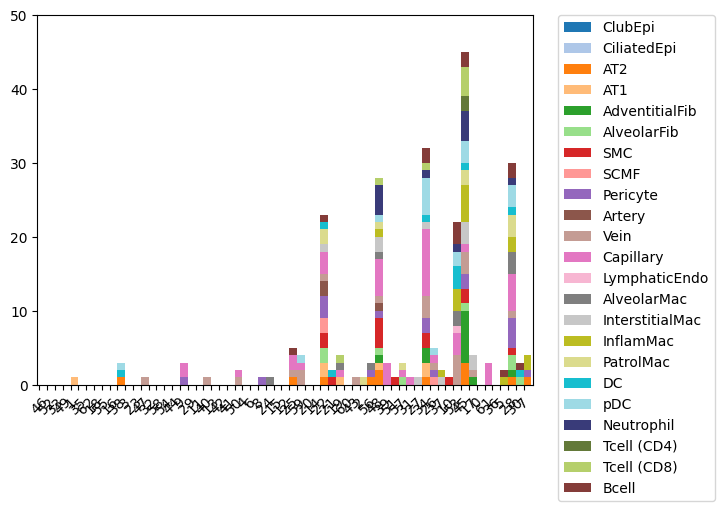

In [9]:
# subset alveolar foci
mask = (all_plaque_comp['CiliatedEpi'] + all_plaque_comp['ClubEpi']) <= 0.01
alveolar = all_plaque_comp[mask].reset_index(drop=True).copy()
alveolar_ifn = all_IFN_num[mask].reset_index(drop=True).copy()
# sort foci based on fraction of alveolar epithelial cells
alveolar_sort = alveolar.assign(
    sum=alveolar['AT1'] + alveolar['AT2']
).sort_values(by='sum', ascending=False)

ordered_indices = alveolar_sort.index.tolist()
print(ordered_indices)
alveolar_ifn_sort = alveolar_ifn.loc[ordered_indices,:]
alveolar_ifn_sort.plot(kind='bar', stacked=True, color = custom_hex,align='edge', width=1.0)
plt.ylim(0, 50)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("251209_alveoli_ifn.pdf", format='pdf')

In [10]:
num = all_plaque_num.reset_index(drop=True).copy()
alveolar_sort = alveolar.assign(
    sum=alveolar['AT1'] + alveolar['AT2']
).sort_values(by='sum', ascending=False)

ordered_indices = alveolar_sort.index.tolist()
alveolar_ifn_sort = alveolar_ifn.loc[ordered_indices,:]
num_sort = num.loc[ordered_indices,:]
sum_alveolar_ifn = alveolar_ifn_sort.sum(axis = 1)
sum_num = num_sort.sum(axis = 1)
frac = sum_alveolar_ifn/sum_num

In [11]:
num = all_plaque_num.reset_index(drop=True).copy()
airway_sort = airway.assign(
    sum=airway['CiliatedEpi'] + airway['ClubEpi']
).sort_values(by='sum', ascending=False)
ordered_indices = airway_sort.index.tolist()
airway_ifn_sort = airway_ifn.loc[ordered_indices,:]
num_sort = num.loc[ordered_indices,:]
sum_airway_ifn = airway_ifn_sort.sum(axis = 1)
sum_num = num_sort.sum(axis = 1)
frac = sum_airway_ifn/sum_num